# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Passanages are always feel sad when they are air travelling and facing delayed flights. It can reduce customer satisfaction and can lead to a bad reputation for both airlines and the company. It can also lead to the folowing accomdation booking not being used and both potential cost for customers and the company. ML can help use to build a model from past experence and patterns. For example, the flight is possibly delayed if the weather is rainy or snowy, and a busy airport is more likely to have delays. Our ML model will help customers to choose time gap between bookings or planing trip more wisely.

### 2. Formulate the business problem, success metrics, and desired ML output.

We will use features in the dataset to build a classificer to predict the filght will be delay or not dealy, confusion matrix and classification report, AUC score will be used to test the model performance. The desired output is to prefectly predict the flight arrival delay or not.

### 3. Identify the type of ML problem you’re dealing with.

It is a binary classification problem, and it is a supervised learning problem. The objective is to predict whether the flight will be delayed or not.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [2]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = os.listdir('./dataset')
base_path = os.getcwd()
csv_base_path = './dataset_csv'

!mkdir -p {csv_base_path}

In [3]:
# How many zip files do we have? write a code to answer it.
count = len([file for file in zip_path if file.endswith('.zip')])
print(count)

60


#### Extract CSV files from ZIP files

In [4]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            for file in z.namelist():
                print(f'Extracting {zipFile_name} ') 
                z.extractall(path = csv_base_path)
    except Exception as e:
        print(f'zip2csv failed for {zipFile_name} with error: {e}')
        
# Extract all the zip files
for file in zip_path:
     zip_file_path = os.path.join("./dataset", file)
     zip2csv(zip_file_path, csv_base_path)
print("Files Extracted")

Extracting ./dataset/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting ./dataset/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting ./dataset/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_3.zip 
Extracting ./dataset/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_3.zip 
Extracting ./dataset/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_2.zip 
Extracting ./dataset/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_2.zip 
Extracting ./dataset/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting ./dataset/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting ./dataset/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_1.zip 
Extracting ./dataset/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_1.zip 
Extracting ./dataset/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_

In [5]:
# How many csv files have we extracted? write a code to answer it.
csv_files = [file for file in os.listdir(csv_base_path) if file.endswith('.csv')]

# Print the number of CSV files
print(f"Number of CSV files extracted: {len(csv_files)}")

Number of CSV files extracted: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [6]:
from IPython.core.display import display, HTML
 # Read the HTML content and display it
 
html_file_path = os.path.abspath(os.path.join(csv_base_path, 'readme.html'))

if os.path.exists(html_file_path):
    with open(html_file_path, 'r') as file:
        html_content = file.read()
    display(HTML(html_content))
else:
    print(f"{html_file_path} does not exist.")


#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [7]:
file_name = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv'
df_temp = pd.read_csv(f'{csv_base_path}/{file_name}')

**Question**: Print the row and column length in the dataset, and print the column names.

In [8]:
row_number, col_number = df_temp.shape
print(f'Number of rows: {row_number}, Number of columns: {col_number}')

columns_names = df_temp.columns.to_list()
print('Column names:')
print(columns_names)

Number of rows: 585749, Number of columns: 110
Column names:
['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'Securit

**Question**: Print the first 10 rows of the dataset.  

In [9]:
print('First 10 rows:', df_temp.head(10))

First 10 rows:    Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363 

From the top 10 rows, there are a lot of columns with NaN values. We will consider to drop some columns later.

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [10]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [11]:
delay_columns = [col for col in df_temp.columns if 'Del' in col]
for col in delay_columns:
    print(col)

DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [12]:
# to answer above questions, complete the following code
row_count, column_count = df_temp.shape
unique_years = df_temp['Year'].dropna().unique()
unique_months = df_temp['Month'].dropna().unique()
df_temp['Date'] = pd.to_datetime(df_temp['FlightDate'])
unique_airlines = df_temp['Reporting_Airline'].unique()
unique_origin_airports = df_temp['Origin'].unique()
unique_dest_airports = df_temp['Dest'].unique()
print("The #rows and #columns are ", row_count , " and ", column_count)
print("The years in this dataset are: ", unique_years)
print("The months covered in this dataset are: ", unique_months)
print("The date range for data is :" , min(df_temp['Date']), " to ", max(df_temp['Date']))
print("The airlines covered in this dataset are: ", list(unique_airlines))
print("The Origin airports covered are: ", list(unique_origin_airports))
print("The Destination airports covered are: ", list(unique_dest_airports))

The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01 00:00:00  to  2018-09-30 00:00:00
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [13]:
counts = pd.DataFrame({'Origin':df_temp['Origin'].value_counts(), 'Destination': df_temp['Dest'].value_counts()})
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [14]:
counts.sort_values(by='Destination',ascending=False).head(15)

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Based on the all the outputs from previous cells, we have a lot of features about each flight. it is possible to predict 
whether a flight will be delayed or not.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [15]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    combined_df = pd.DataFrame()
    for file in csv_files:
        df = pd.read_csv(f'{csv_base_path}/{file}')
        df_filtered = df[filter_cols]
        for col, vals in zip(subset_cols, subset_vals):
            df_filtered = df_filtered[df_filtered[col].isin(vals)]
        combined_df = pd.concat([combined_df, df_filtered])
    # Save the combined dataframe to a new csv file
    combined_df.to_csv(file_name, index=False)
    return combined_df
    

In [16]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [17]:
start = time.time()

combined_csv_filename = f"{base_path}/combined_files.csv"

# < write code to call the combined_csv function>
combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 3.58 minutes


#### Load dataset

Load the combined dataset.

In [18]:
data = pd.read_csv("combined_files.csv")

In [19]:
print('All Airlines in csv:')
print(data['Reporting_Airline'].unique())
print('All Origin Airports in csv:')
print(data['Origin'].unique())

All Airlines in csv:
['AA' 'DL' 'WN' 'UA' 'OO']
All Origin Airports in csv:
['DFW' 'SFO' 'DEN' 'PHX' 'IAH' 'ATL' 'ORD' 'LAX' 'CLT']


Print the first 5 records.

In [20]:
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,4,10,1,3,2014-10-01,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-9.0,0.0,0.0,195.0
1,2014,4,10,2,4,2014-10-02,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,40.0,40.0,1.0,199.0
2,2014,4,10,3,5,2014-10-03,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,9.0,9.0,0.0,196.0
3,2014,4,10,4,6,2014-10-04,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-16.0,0.0,0.0,195.0
4,2014,4,10,5,7,2014-10-05,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-8.0,0.0,0.0,192.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [21]:
# to answer above questions, complete the following code
full_row_count, full_column_count = data.shape
full_unique_years = data['Year'].dropna().unique()
full_unique_months = data['Month'].dropna().unique()
data['Date'] = pd.to_datetime(data['FlightDate'])
full_unique_airlines = data['Reporting_Airline'].unique()
full_unique_origin_airports = data['Origin'].unique()
full_unique_dest_airports = data['Dest'].unique()
print("The #rows and #columns are ", full_row_count , " and ", full_column_count)
print("The years in this dataset are: ", list(full_unique_years))
print("The months covered in this dataset are: ", sorted(list(full_unique_months)))
print("The date range for data is :" , min(data['Date']), " to ", max(data['Date']))
print("The airlines covered in this dataset are: ", list(full_unique_airlines))
print("The Origin airports covered are: ", list(full_unique_origin_airports))
print("The Destination airports covered are: ", list(full_unique_dest_airports))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014, 2017, 2018, 2015, 2016]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is : 2014-01-01 00:00:00  to  2018-12-31 00:00:00
The airlines covered in this dataset are:  ['AA', 'DL', 'WN', 'UA', 'OO']
The Origin airports covered are:  ['DFW', 'SFO', 'DEN', 'PHX', 'IAH', 'ATL', 'ORD', 'LAX', 'CLT']
The Destination airports covered are:  ['SFO', 'DFW', 'DEN', 'PHX', 'ORD', 'IAH', 'ATL', 'LAX', 'CLT']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [22]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [23]:
data.isnull().sum()

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
Date                     0
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [24]:
### Remove null columns
data = data[~data['ArrDelay'].isnull()]

Check the number of null values in each column again

In [25]:
data.isnull().sum()

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
AirTime              0
Date                 0
dtype: int64

Get the hour of the day in 24-hour time format from CRSDepTime.

In [26]:
data['DepHourofDay'] = data['CRSDepTime'].astype(str).str.zfill(4).str[:2].astype(int)
print(data['DepHourofDay'].head())

0    7
1    7
2    7
3    7
4    7
Name: DepHourofDay, dtype: int64


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

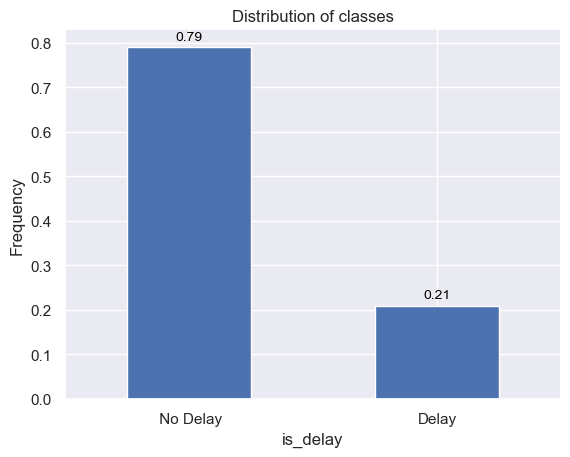

In [27]:
ax = (data.groupby("is_delay").size()/len(data) ).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.xticks(ticks=[0, 1], labels=[' No Delay', 'Delay'],rotation=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

As shown in the bar plot above, No delay is 79% and Delay is 21% of the data. Most of the flights are not delayed. This is an 
heavtly imbalanced dataset. It can inroduce bias to our model. The ML model will prefer more toward no delay. We will introduce 
classification report to check model prediction on both classes.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

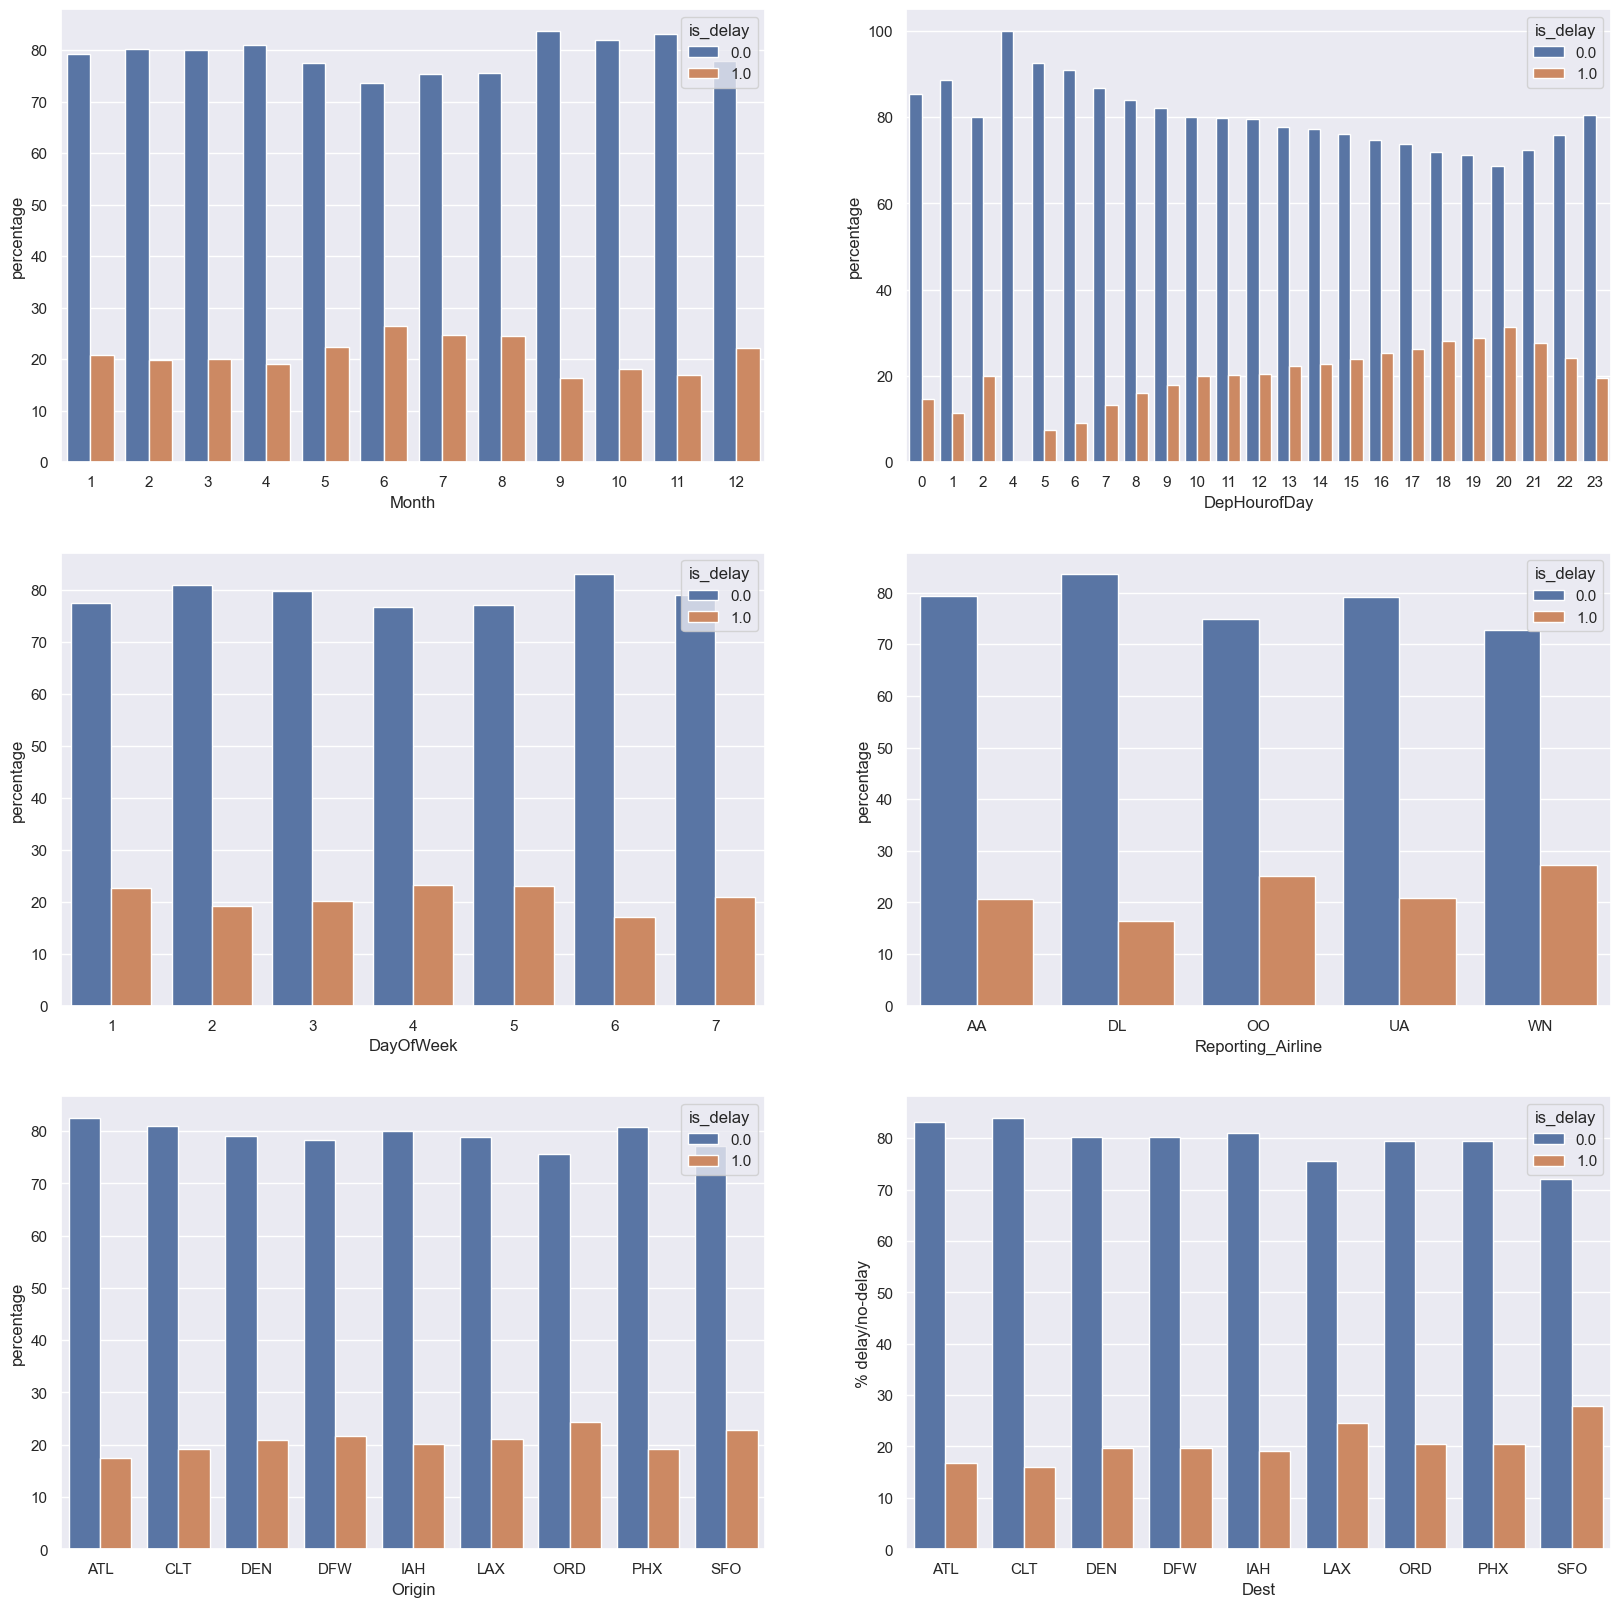

In [28]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

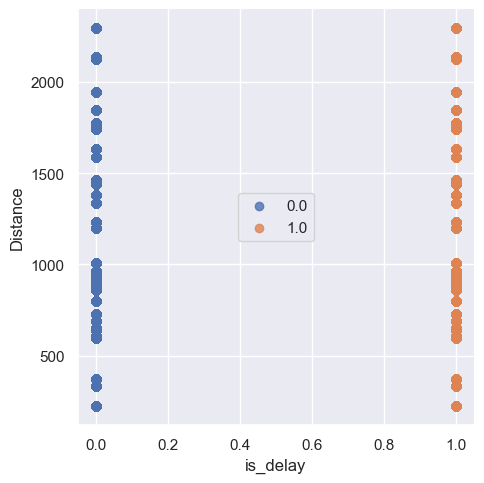

In [29]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

In [30]:
delays_by_month = data.groupby('Month')['is_delay'].mean().sort_values(ascending=False)
print(f"Most delays in month: {delays_by_month.index[0]}, Least delays in month: {delays_by_month.index[-1]}")
delays_by_hour = data.groupby('DepHourofDay')['is_delay'].mean().sort_values(ascending=False)
print(f"Most delays at hour: {delays_by_hour.index[0]}, Least delays at hour: {delays_by_hour.index[-1]}")
delays_by_day = data.groupby('DayOfWeek')['is_delay'].mean().sort_values(ascending=False)
print(f"Most delays on day: {delays_by_day.index[0]}, Least delays on day: {delays_by_day.index[-1]}")
delays_by_airline = data.groupby('Reporting_Airline')['is_delay'].mean().sort_values(ascending=False)
print(f"Most delays by airline: {delays_by_airline.index[0]}, Least delays by airline: {delays_by_airline.index[-1]}")
delays_by_origin = data.groupby('Origin')['is_delay'].mean().sort_values(ascending=False)
print(f"Most delays from origin airport: {delays_by_origin.index[0]}, Least delays from origin airport: {delays_by_origin.index[-1]}")
delays_by_dest = data.groupby('Dest')['is_delay'].mean().sort_values(ascending=False)
print(f"Most delays at destination airport: {delays_by_dest.index[0]}, Least delays at destination airport: {delays_by_dest.index[-1]}")
correlation = data['Distance'].corr(data['is_delay'])
print(f"Correlation between Flight Distance and Delays: {correlation:.2f}")


Most delays in month: 6, Least delays in month: 9
Most delays at hour: 20, Least delays at hour: 4
Most delays on day: 4, Least delays on day: 6
Most delays by airline: WN, Least delays by airline: DL
Most delays from origin airport: ORD, Least delays from origin airport: ATL
Most delays at destination airport: SFO, Least delays at destination airport: CLT
Correlation between Flight Distance and Delays: -0.01


Most delay month is June and least delay month is September. \
Most delay hour of day is 20 and least delay hour of day is 4. \
Most delay day of week is Thursday and least delay day of week is Saturday. \
Most delay reporting airline is WN and least delay reporting airline is DL. \
Most delay origin airport is ORD and least delay origin airport is ATL. \
Most delay destination airport is SFO and least delay destination airport is SLT. \
Distance is not a significant factor for delay, two distribution is very similiar.

### Features

Look at all the columns and what their specific types are.

In [31]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'Date',
       'DepHourofDay'],
      dtype='object')

In [32]:
data.dtypes

Year                          int64
Quarter                       int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
FlightDate                   object
Reporting_Airline            object
Origin                       object
OriginState                  object
Dest                         object
DestState                    object
CRSDepTime                    int64
Cancelled                   float64
Diverted                    float64
Distance                    float64
DistanceGroup                 int64
ArrDelay                    float64
ArrDelayMinutes             float64
is_delay                    float64
AirTime                     float64
Date                 datetime64[ns]
DepHourofDay                  int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [33]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [34]:
for col in categorical_columns:
    data_dummies = pd.get_dummies(data[col], drop_first=True, prefix=col) # Enter your code here
    data = pd.concat([data, data_dummies], axis = 1)
    data.drop(col,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [35]:
data.shape

(1635590, 94)

In [36]:
data.columns

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [37]:
data.rename(columns = {'is_delay': 'target'}, inplace=True )

In [38]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B
data.to_csv('combined_csv_v1.csv', index=False)

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [40]:
# Double check for any null values, it should print False, but it may be True due to kernel error.
any(data.isnull().sum())

False

In [41]:
# write Code here to split data into train test
from sklearn.model_selection import train_test_split
X = data.drop(columns=['target'])
y = data['target'] 
random_state = 66
train_data, test_data, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=random_state)

### Baseline classification model

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(train_data, train_target)

LogisticRegression(max_iter=1000)

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [43]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    con_matrx = confusion_matrix(test_labels, target_predicted)
    sns.heatmap(con_matrx, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Delay', 'Delay'],
                yticklabels=['No Delay', 'Delay'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    

In [44]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted):

    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    roc_auc = metrics.auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

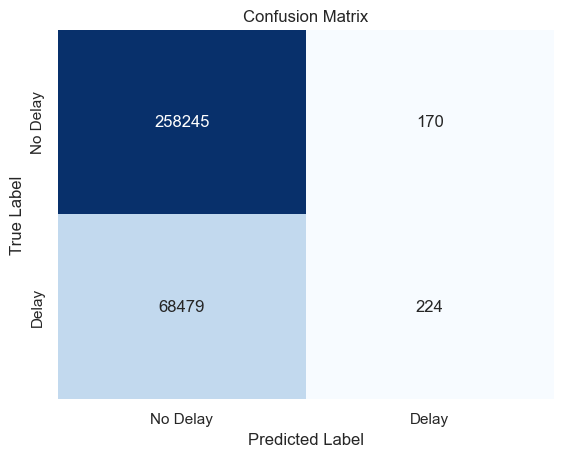

In [45]:
target_predicted = model.predict(test_data)
plot_confusion_matrix(test_target, target_predicted)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258415
         1.0       0.57      0.00      0.01     68703

    accuracy                           0.79    327118
   macro avg       0.68      0.50      0.44    327118
weighted avg       0.74      0.79      0.70    327118

Test Accuracy: 0.7901
Train Accuracy: 0.7903


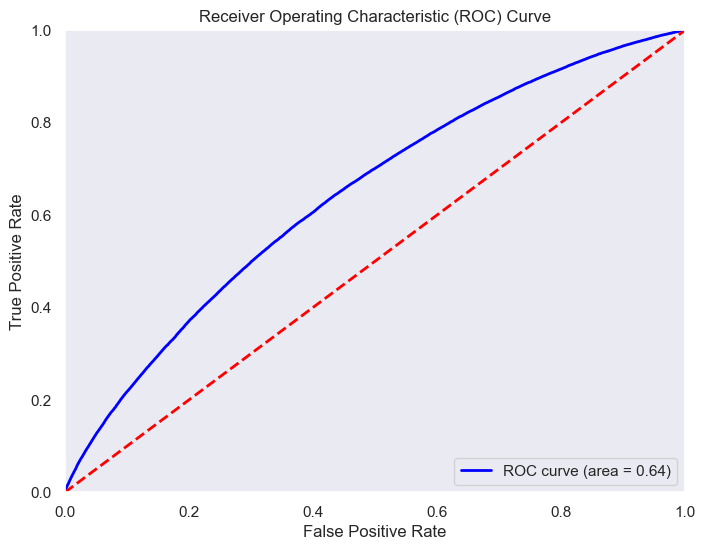

In [46]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_target, target_predicted))
test_accuracy = accuracy_score(test_target, target_predicted)
print(f'Test Accuracy: {test_accuracy:.4f}')
train_accuracy = accuracy_score(train_target, model.predict(train_data))
print(f'Train Accuracy: {train_accuracy:.4f}')
y_scores = model.predict_proba(test_data)[:,1]
plot_roc(test_target, y_scores)


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


From the confusion matrix, the model has perfermed poorly. It almost classifies all the data as no delay, since the dataset is 
imbalanced. The test accuracy is 0.7901 and training accuracy is 0.7903, which means the model is not overfitted. If only by checking 
the accuracy, the model seems to be performing well, but the confusion matrix shows that the model is not performing well on the delay class.

The model has a very low recall, precision and F1 score for the delay class. 0.57 precision means that the model can only correctly
classify 57% of the delay class, which is just over than half. The recall of 0.00 means that the model cannot correctly classify any of the delay class. The F1 score
of 0.01 means that the model is performing very poorly on delay class, the reason is that the dataset is imbalanced, and the model is biased towards the no delay class.

The ROC curve is also poor, with an AUC of 0.64, which is just better than random guessing.

The model is not good enough to use in business standpoint, since it will always predict no delay, which is not useful. 
The model needs to be improved by balancing the dataset, by undersampling the no delay class or oversampling the delay class when 
splitting the data into train and test. The model can also be improved by using other models like Random Forest, decision trees, neural networks.
We can also use PCA or Recursive Feature Elimination to reduce the number of features, or adding more features and improve the model performance.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [14]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [67]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18
holidays = set(pd.to_datetime(holidays))
### Add indicator variable for holidays
data_orig = pd.read_csv("combined_files.csv")
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays).astype(int)

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [68]:
# download data from the link above and place it into the data folder
weather_url = 'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31'
weather_data = pd.read_csv(weather_url)
weather_data.to_csv('weather_data.csv', index=False)

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [69]:
weather = pd.read_csv('weather_data.csv') # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = dict(zip(station, airports))
weather['airport'] = weather['STATION'].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [70]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [71]:
print("The shape of weather data:", weather.shape)
print(weather.isna().sum())
print(weather.dtypes)

The shape of weather data: (16434, 11)
STATION       0
DATE          0
AWND          0
PRCP          0
SNOW       5478
SNWD       5478
TAVG         62
TMAX         20
TMIN         20
airport       0
MONTH         0
dtype: int64
STATION     object
DATE        object
AWND         int64
PRCP         int64
SNOW       float64
SNWD       float64
TAVG       float64
TMAX       float64
TMIN       float64
airport     object
MONTH       object
dtype: object


In [72]:
print("SNOW unique values:", weather['SNOW'].unique())
print("SNWD unique values:", weather['SNWD'].unique())

SNOW unique values: [ nan   0.   3.  15.  56.  81.   5.  91.  43.  58.   8.  20.  25.  41.
  13.  36.  18.  86.  10. 137.  46.  76.  23.  97. 152.  79.  53.  74.
  48. 104.  89.  30.  71.  33. 196. 175. 119. 333. 300.  51.  38. 107.
  66.  61. 145.  69. 147. 221.  28.  64. 127.  94. 411. 142. 178. 163.
 130.  99. 157.  84. 117.]
SNWD unique values: [ nan   0.  30.  50.  80. 100. 150. 230. 130. 180. 250. 200. 280. 300.
 330. 360. 460. 430. 410. 380.  25.  51.]


Since there are 5478 missing values in SNOW and SNWD, which is 5478/16434 = 33% of the data, we cannot drop the coulmns,
and they are numerical, we can either fill them with the mean or median of the column group by the airport and month, or 
just simply fill them with 0.

#### Fill NAN with 0 for SNOW and SNWD

In [73]:
weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

#### Fill NAN value with median

In [ ]:
weather.SNOW.fillna(weather.SNOW.groupby([weather['airport'], weather['MONTH']]).transform('median'), inplace=True)
weather.SNWD.fillna(weather.SNWD.groupby([weather['airport'], weather['MONTH']]).transform('median'), inplace=True)
weather.isna().sum()

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [74]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [75]:
weather_impute = weather.groupby(['MONTH','STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

,MONTH,STATION,TAVG,TMAX,TMIN
0,01,USW00003017,-2.741935,74.000000,-69.858065
1,01,USW00003927,79.529032,143.767742,20.696774


Merge the mean data with the weather data.

In [76]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [77]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [78]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [79]:
### Add origin weather conditions
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])
weather['DATE'] = pd.to_datetime(weather['DATE'])
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [80]:
sum(data.isna().any())

0

In [81]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime', 'is_holiday',
       'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'SNOW_D',
       'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [82]:
data = data_orig.copy()
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)
data['DepHourofDay'] = data['CRSDepTime'].astype(str).str.zfill(4).str[:2].astype(int)
data = data[~data['ArrDelay'].isnull()]
print(data.isna().sum())
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
AirTime              0
is_holiday           0
AWND_O               0
PRCP_O               0
SNOW_O               0
TAVG_O               0
AWND_D               0
PRCP_D               0
SNOW_D               0
TAVG_D               0
DepHourofDay         0
dtype: int64


In [83]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [84]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [85]:
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [86]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer

data.to_csv("combined_csv_v2.csv", index=False)

Create the training and testing sets again.

In [87]:
X = data.drop(columns=['target'])
y = data['target'] 
train_data, test_data, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [88]:
# Instantiate another logistic regression model
classifier2 = LogisticRegression(max_iter=1000)

In [89]:
classifier2.fit(train_data, train_target)

LogisticRegression(max_iter=1000)

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

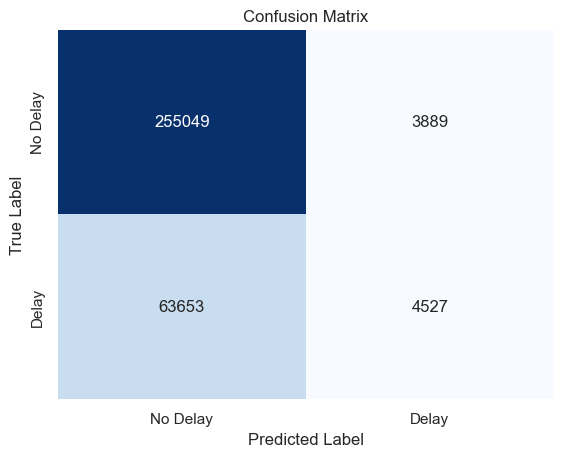

In [90]:
target_predicted = classifier2.predict(test_data)
plot_confusion_matrix(test_target, target_predicted)

              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88    258938
         1.0       0.54      0.07      0.12     68180

    accuracy                           0.79    327118
   macro avg       0.67      0.53      0.50    327118
weighted avg       0.75      0.79      0.72    327118

Test Accuracy: 0.7935
Train Accuracy: 0.7923


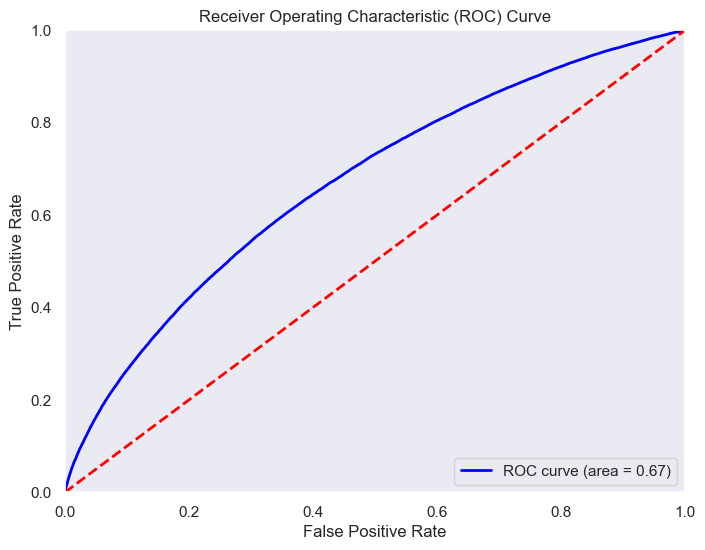

In [91]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_target, target_predicted))
test_accuracy = accuracy_score(test_target, target_predicted)
print(f'Test Accuracy: {test_accuracy:.4f}')
train_accuracy = accuracy_score(train_target, classifier2.predict(train_data))
print(f'Train Accuracy: {train_accuracy:.4f}')
y_scores = classifier2.predict_proba(test_data)[:,1]
plot_roc(test_target, y_scores)

Question: did you notice a difference by adding the extra data on the results?

As show in the confusion matrix, the model is not performing well, but it has been improved by adding weather data. More delay
data has been successfully identified. However, there are still many false negatives, which is delay that has been predicted as no delay.
The model is still highly biased towards predicting no delay. 

The classification report shows that the model's ferformance on 1 which delay has been improved. The recall has increased from 0.00 to 0.07,
but it is still very low.  The training and test accuracy have increased slightly, but not much.

The ROC curve shows that the model is performing better than the previous model. The AUC has increased from 0.64 to 0.67. The model is
still not performing well, but it has been improved.

Overall, this model has not satisfied the requirements of the business goal.


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

https://public.tableau.com/views/DSTSFinal/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
https://public.tableau.com/views/DSTSFinal2/Dashboard2?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

Both two models have similar accuracy and both not achiecing our business goal.
but the second model has a better AUC score. The second model has a better performance, 
because it includes weather data which is an important factor in predicting flight delays. Both models are 
highly biased towards predicting no delays. We can undersample the delay class to balance the training data or 
undersample the no delay class. 

In first model, we can add feature hours of the day, and manually create a feature for holidays. Onehot encoding has 
been used for categorical variables. In the second model, we have added weather data to the data, these has helped 
improve the model performance. 

The challenges in this project is the dataset is very large and it will take a lot manmeroy on the computer, and takes
some time to train. the data has many missing values and we have to handle them. The biggest challenge is dataset is highly imbalanced.  

The most important thing I learned from this project is how to handle large datasets, missing values,
using one hot encoding for categorical variables, building logistic regression model, adding features from another dataset,
visualizing data by Tableau, and sharing the result in github.